In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DV
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import MinMaxScaler

/content/drive/MyDrive/DV


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('adult.data', sep=", ", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
"marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]
df = df[df["workclass"] != '?']
df = df[df["education"] != '?']
df = df[df["marital-status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["native-country"] != '?']
initial_df = df


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df.columns = [i.replace('-', '_') for i in df.columns]
dfw = pd.cut(df.hours_per_week, bins = [0, 20, 40, 60, 80, 100],            
  labels = ['=<20','>20 & =<40', '>40 & =<60', '>60 & =<80', '>80 & =<100'])
df.insert(5, "hours_per_week_category", dfw)
df.head()



0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 30162, dtype: object


In [ ]:


below_50K = df[df["salary_range"] == "<=50K"].sample(7508)
above_50K = df[df["salary_range"] == ">50K"]

df = pd.concat([above_50K, below_50K])
df['class'] = (df["salary_range"] == ">50K") * 1


22654
7508


11643


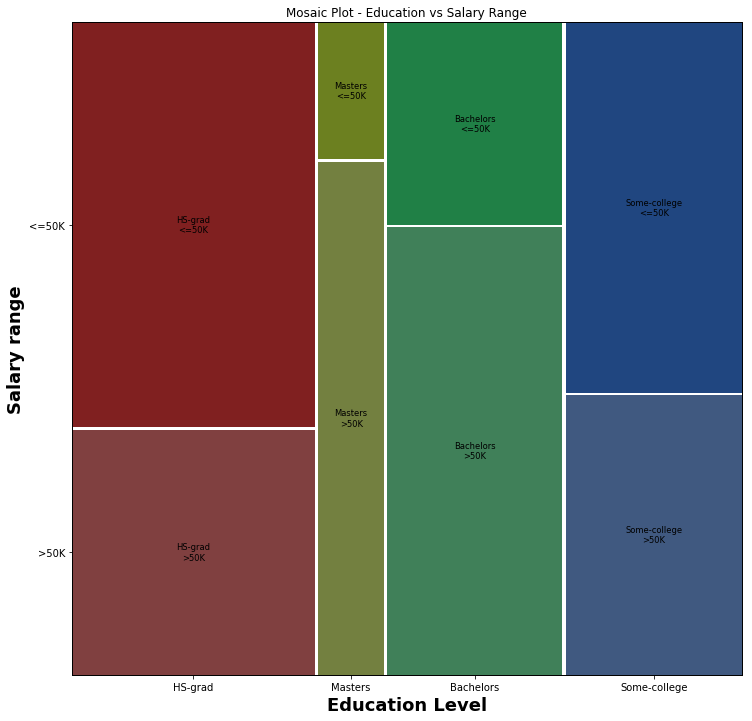

In [ ]:
education_list_1 = pd.Series(['HS-grad', 'Some-college', 'Bachelors', 'Masters'])
df_education = df[df['education'].isin(education_list_1)]

fig, ax = plt.subplots()


fig.set_size_inches(12, 12, forward=True)

ax.set_ylabel('Salary range', 
               fontweight ='bold',fontsize = 18)
ax.set_xlabel('Education Level', 
               fontweight ='bold',fontsize = 18)

fig, _= mosaic(df_education, ['education', 'salary_range'],ax = ax, title= 'Mosaic Plot - Education vs Salary Range')



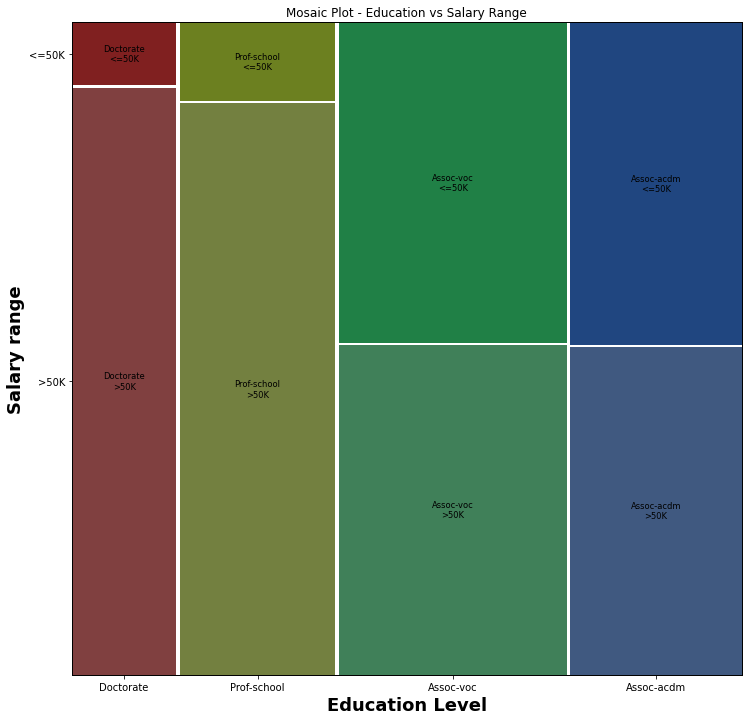

In [ ]:
education_list_2 = pd.Series(['Doctorate', 'Prof-school', 'Assoc-voc', 'Assoc-acdm'])
df_education = df[df['education'].isin(education_list_2)]
fig, ax = plt.subplots()
# fig.suptitle('Mosaic Plot - Education Vs Salary Range',
#              fontsize = 20, fontweight ='bold')

fig.set_size_inches(12, 12, forward=True)

ax.set_ylabel('Salary range', 
               fontweight ='bold',fontsize = 18)
ax.set_xlabel('Education Level', 
               fontweight ='bold',fontsize = 18)

fig, _= mosaic(df_education, ['education', 'salary_range'],ax = ax,title= 'Mosaic Plot - Education vs Salary Range')

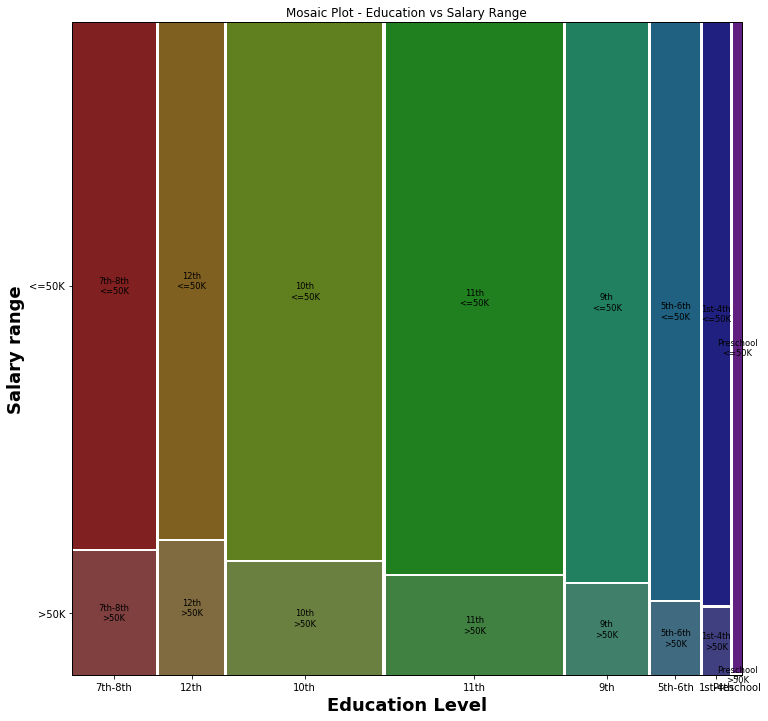

In [ ]:
df_education = df[~df['education'].isin(education_list_1) 
& ~df['education'].isin(education_list_2)]

fig, ax = plt.subplots()
# fig.suptitle('Mosaic Plot - Education Vs Salary Range',
#              fontsize = 20, fontweight ='bold')

fig.set_size_inches(12, 12, forward=True)

ax.set_ylabel('Salary range', 
               fontweight ='bold',fontsize = 18)
ax.set_xlabel('Education Level', 
               fontweight ='bold',fontsize = 18)

fig, _= mosaic(df_education, ['education', 'salary_range'],ax = ax,title= 'Mosaic Plot - Education vs Salary Range')
# _, fig = mosaic(df_education, ['education', 'salary_range'])
# _.set_size_inches(20, 10, forward=True)

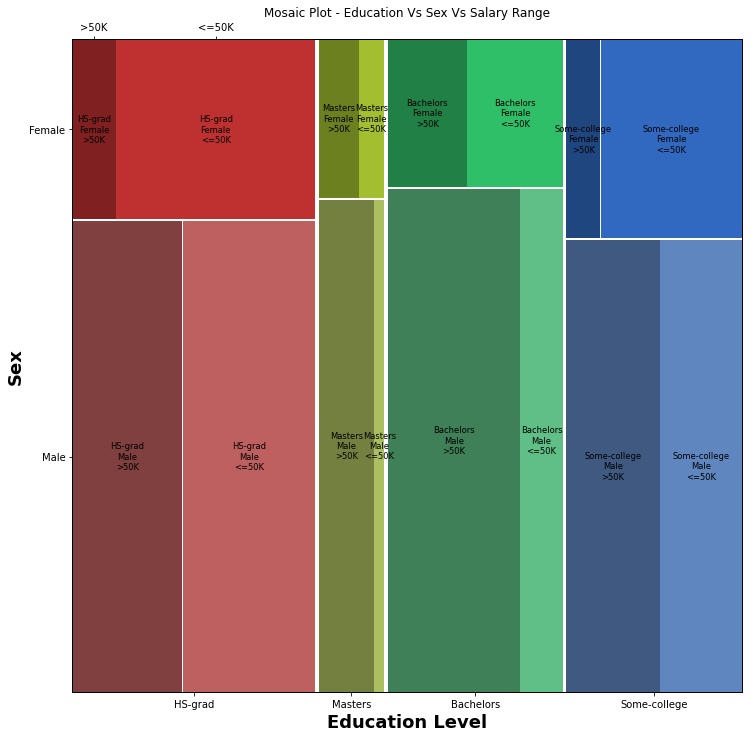

In [ ]:
df_education = df[df['education'].isin(education_list_1)]

fig, ax = plt.subplots()


fig.set_size_inches(12, 12, forward=True)

ax.set_ylabel('Sex', 
               fontweight ='bold',fontsize = 18)
ax.set_xlabel('Education Level', 
               fontweight ='bold',fontsize = 18)

fig, _ = mosaic(df_education, ['education', 'sex', 'salary_range'],ax=ax,title= 'Mosaic Plot - Education Vs Sex Vs Salary Range')


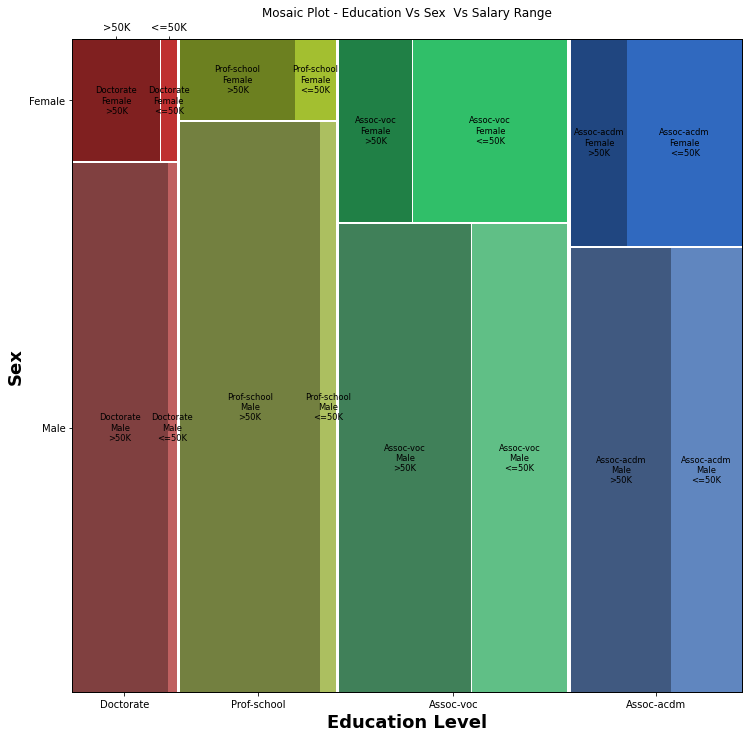

In [ ]:
df_education = df[df['education'].isin(education_list_2)]

fig, ax = plt.subplots()
# fig.suptitle('Mosaic Plot - Education Vs Sex vs Salary Range',
#              fontsize = 20, fontweight ='bold')

fig.set_size_inches(12, 12, forward=True)

ax.set_ylabel('Sex', 
               fontweight ='bold',fontsize = 18)
ax.set_xlabel('Education Level', 
               fontweight ='bold',fontsize = 18)

fig, _ = mosaic(df_education, ['education', 'sex', 'salary_range'],ax=ax, title= 'Mosaic Plot - Education Vs Sex  Vs Salary Range')

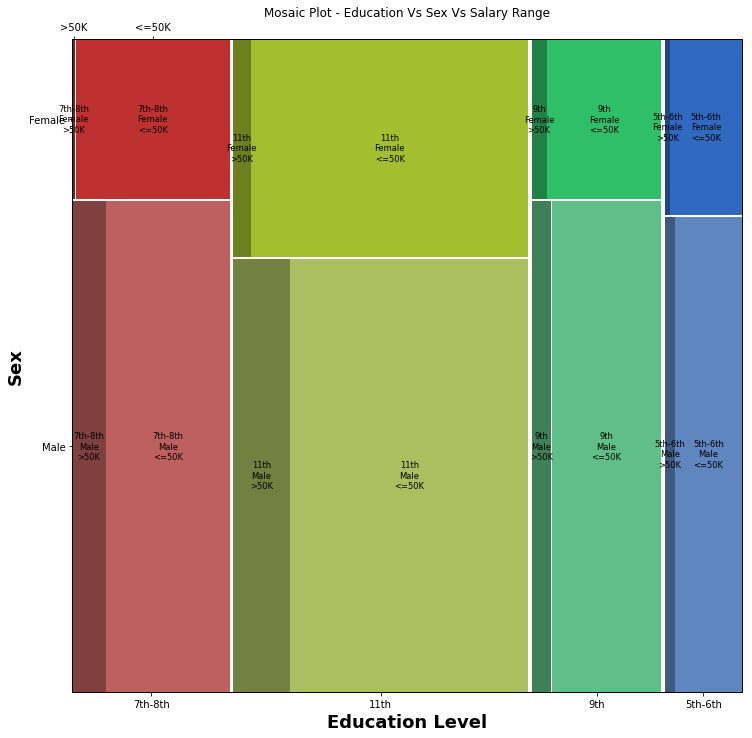

In [ ]:
education_list_3 = pd.Series(['11th', '9th', '7th-8th', '5th-6th'])

df_education = df[df['education'].isin(education_list_3)]

fig, ax = plt.subplots()
# fig.suptitle('Mosaic Plot - Education Vs Sex vs Salary Range',
#              fontsize = 20, fontweight ='bold')

fig.set_size_inches(12, 12, forward=True)

ax.set_ylabel('Sex', 
               fontweight ='bold',fontsize = 18)
ax.set_xlabel('Education Level', 
               fontweight ='bold',fontsize = 18)

fig, _ = mosaic(df_education, ['education', 'sex', 'salary_range'],ax=ax, title= 'Mosaic Plot - Education Vs Sex Vs Salary Range')

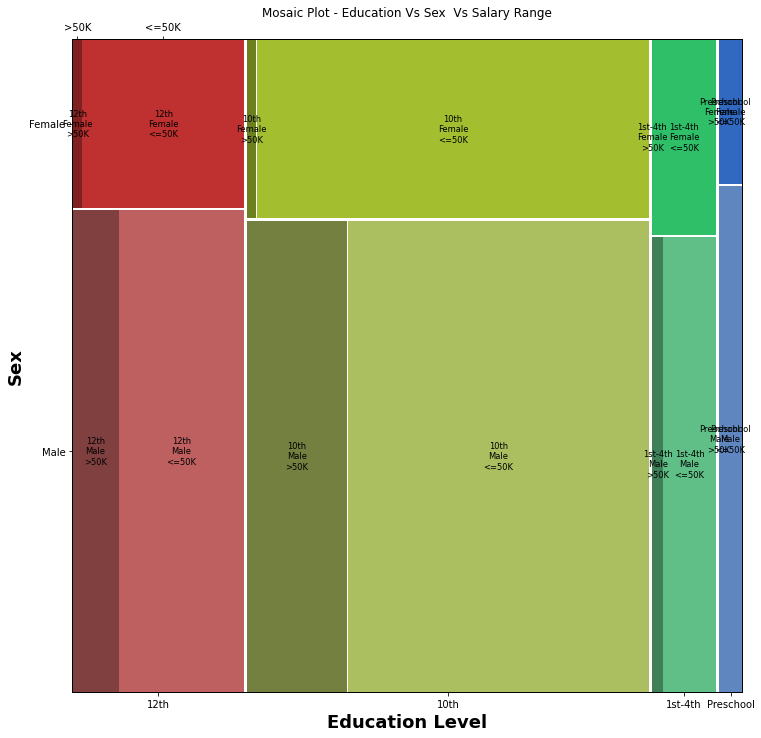

In [ ]:
df_education = df[~df['education'].isin(education_list_1) 
& ~df['education'].isin(education_list_2) & ~df['education'].isin(education_list_3)]
fig, ax = plt.subplots()
# fig.suptitle('Mosaic Plot - Education Vs Sex Salary Range',
#              fontsize = 20, fontweight ='bold')

fig.set_size_inches(12, 12, forward=True)

ax.set_ylabel('Sex', 
               fontweight ='bold',fontsize = 18)
ax.set_xlabel('Education Level', 
               fontweight ='bold',fontsize = 18)

_, fig = mosaic(df_education, ['education', 'sex', 'salary_range'],ax=ax, title= 'Mosaic Plot - Education Vs Sex  Vs Salary Range')
# _.set_size_inches(20, 7, forward=True)

In [ ]:
# Check if any other countries are missed

region_dict = {
    "Europe": "England, Germany, Greece, Italy, Poland, Portugal, Ireland, France, Scotland, Yugoslavia, Hungary, Holand-Netherlands",
    "Asia": "Cambodia, India, Japan, China, Iran, Philippines, Vietnam, Laos, Taiwan, Thailand",
    "North America": "United-States, Puerto-Rico, Canada, Outlying-US(Guam-USVI-etc)",
    "South America": "Columbia, Peru, Ecuador",
    "Central America": "Cuba, Honduras, Jamaica, Mexico, Dominican-Republic, , Haiti, Guatemala, Nicaragua, El-Salvador, Trinadad&Tobago"
}

for key in region_dict.keys():
  region_dict[key] = region_dict[key].split(", ")

In [ ]:
p = 0
df_region = df
for i in range(len(df.iloc[:,14].to_list())):
  for key in region_dict.keys():
    if df.iloc[i, 14] in region_dict[key]:
      df_region.iat[i, 14] = key
      if i == 0:
        print(df_region.iloc[i, 14])
      break

North America


## Occupation
From the visualization, we can see that Exec-managerial, Prof-speciality are predominantly >50K. On the other hand, Adm-clerical, Other-service, Machine-op-inspct, Handlers-cleaners all predominantly belong to <50K class. This tells us that majority of the occupations have enough skew in them to be a useful factor of income.

In [ ]:
import plotly.express as px
color = df_region.salary_range
colorscale = [['<=50K', 'lightsteelblue'], ['>50K', 'mediumseagreen']]
fig = px.parallel_categories(df_region, dimensions=['occupation', 'salary_range'],
                labels={'education': "education level", "salary_range": 'salary_range'},
                title="Parallel sets graph - Occupation Vs Salary Range")
fig.show()

In [ ]:
fig = px.parallel_categories(df_region, dimensions=['sex', 'marital_status', 'salary_range'],
      labels={'education': "education level", "salary_range": 'salary_range'},
      title="Parallel sets graph - Sex Vs Marital Status vs Salary Range")
fig.show()

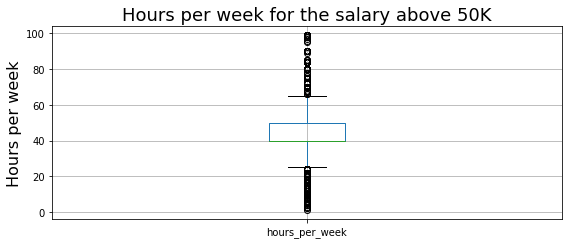

In [ ]:
plt.rcParams["figure.figsize"] = [8, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Hours per week for the salary above 50K",fontsize=18)
plt.ylabel('Hours per week',fontsize=16)
pd.plotting.boxplot(above_50K, column = 'hours_per_week')
plt.show()


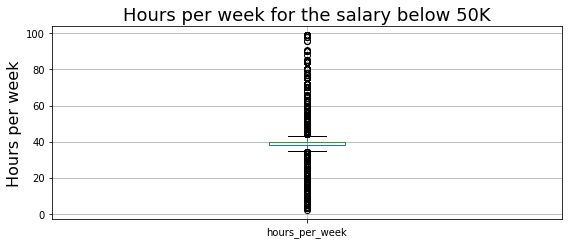

In [ ]:
plt.rcParams["figure.figsize"] = [8, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Hours per week for the salary below 50K",fontsize=18)
plt.ylabel('Hours per week',fontsize=16)
pd.plotting.boxplot(below_50K, column = 'hours_per_week')
plt.show()


In [ ]:
# colors = df['class']
# x = df['hours_per_week']
# y = df['capital_gain']
# plt.scatter(x, y, c = colors)
# plt.title("Scatter plot - Capital Gain vs Hours per Week purple <=50K, yellow >50K")
# plt.xlabel('hours_per_week')
# plt.ylabel('capital_gain')

##Pie charts for Region
We categorize the countries in the following regions: North America, South America, Asia, Central America, Europe and two countries that could not be classified. The pie charts represent % of people from that region belonging to each class of salary range. For most regions, there is a clear disparity in the classes they belong to. Hence, this is the 5th important feature to determine salary class.

In [ ]:
def analyze_per_unique_value(column):
    unique_values = df[column].unique()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=len(unique_values), figsize=(5,5 * len(unique_values)))

    for i, val in enumerate(unique_values):
        val_df = df[df[column] == val]
        above_50k = val_df[val_df["class"] == 1]
        below_50k = val_df[val_df["class"] == 0]
        axes[i].pie([len(below_50k.index), len(above_50k.index)], labels=["<=50K (Count-" + str(len(below_50k.index)) + ")", ">50K (Count-" + str(len(above_50k.index)) + ")"], autopct='%1.0f%%')
        axes[i].set_title(val)
    
    plt.show()

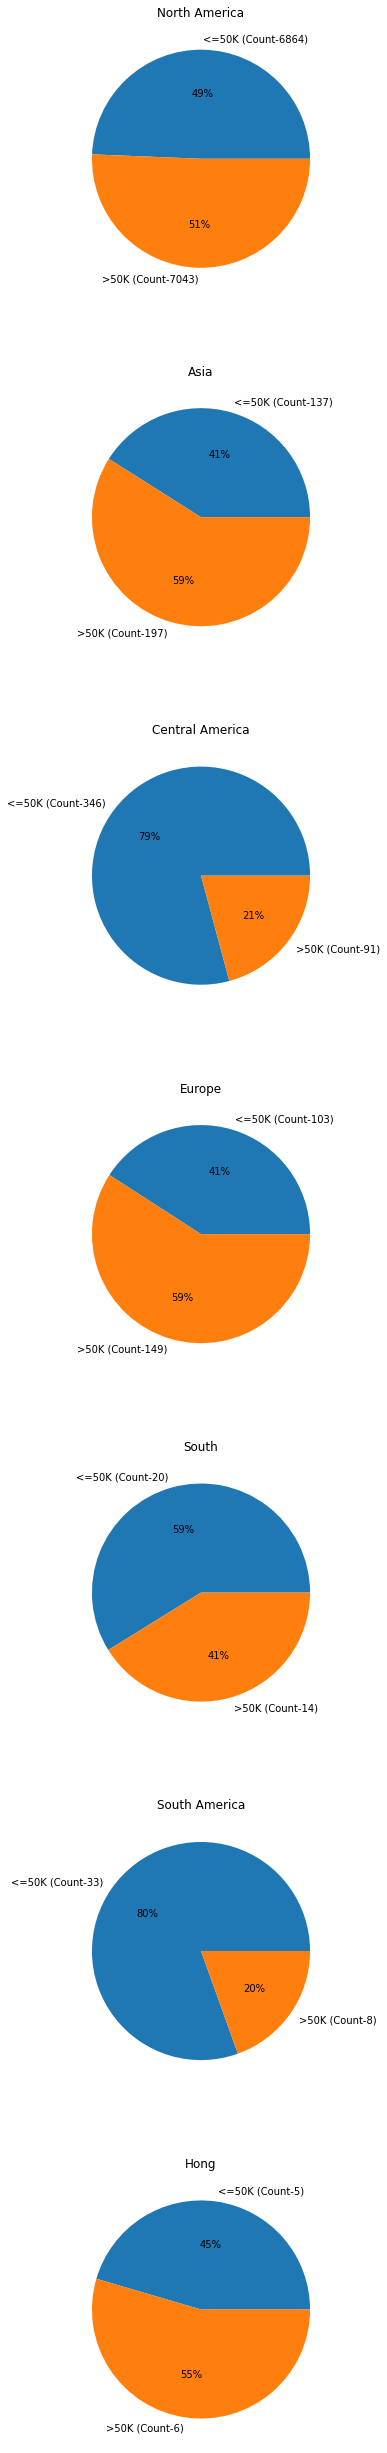

In [ ]:
analyze_per_unique_value("native_country")

##Bar graph for workclass
This graph shows percentages of people in each workclass above and below the salary mark of 50k. This graph shows that except Federal-gov and self-emp-inc and without-pay, all other classes have more or less the same ratio of people above and below the markation. Thus, this feature is not particularly helpful to determine salary.

In [ ]:
from matplotlib.axis import YTick
unique = pd.unique(df['workclass'])
Y = []
Z = []
for item in unique:
  y = len(df[(df['workclass'] == item) & (df['class'] == 0)]['workclass'].to_list())
  z = len(df[(df['workclass'] == item) & (df['class'] == 1)]['workclass'].to_list())
  Y.append(y*100/(y+z))
  Z.append(z*100/(y+z))

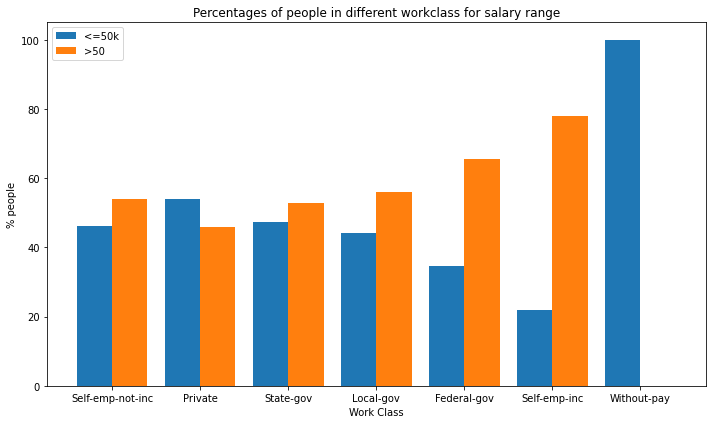

In [ ]:
import numpy as np
X = pd.unique(df['workclass'])
plt.rcParams["figure.figsize"] = (10,6)
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = '<=50k')
plt.bar(X_axis + 0.2, Z, 0.4, label = '>50')
  
plt.xticks(X_axis, X)
plt.xlabel("Work Class")
plt.ylabel("% people")
plt.title("Percentages of people in different workclass for salary range")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Box plot for salaray above 50K - Age ')

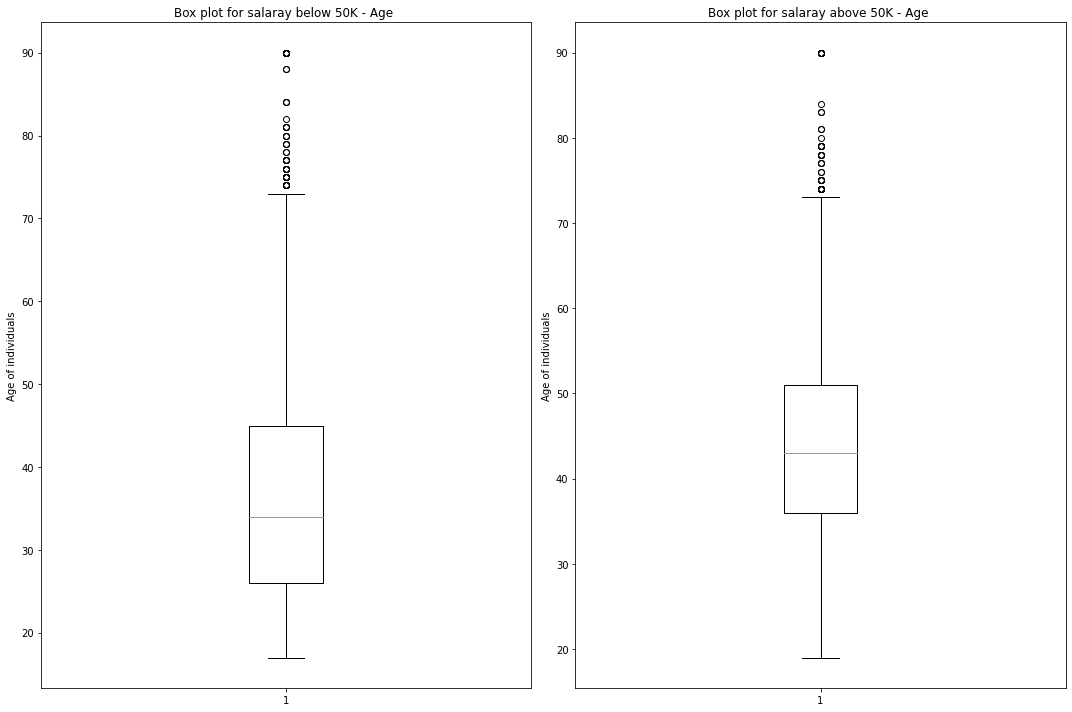

In [ ]:
# Consider age among all the 14 factors
below_50K_initial = df[df["salary_range"] == "<=50K"]
above_50K_initial = df[df["salary_range"] == ">50K"]
below_50K_age = list(below_50K['age'])
above_50K_age = list(above_50K['age'])
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,10))
axes[0].boxplot(below_50K_age)
axes[0].set_ylabel("Age of individuals")
axes[0].set_title("Box plot for salaray below 50K - Age ")
axes[1].set_ylabel("Age of individuals")
axes[1].boxplot(above_50K_age)
axes[1].set_title("Box plot for salaray above 50K - Age ")


Text(0.5, 1.0, 'Histogram for salaray above 50K - Age ')

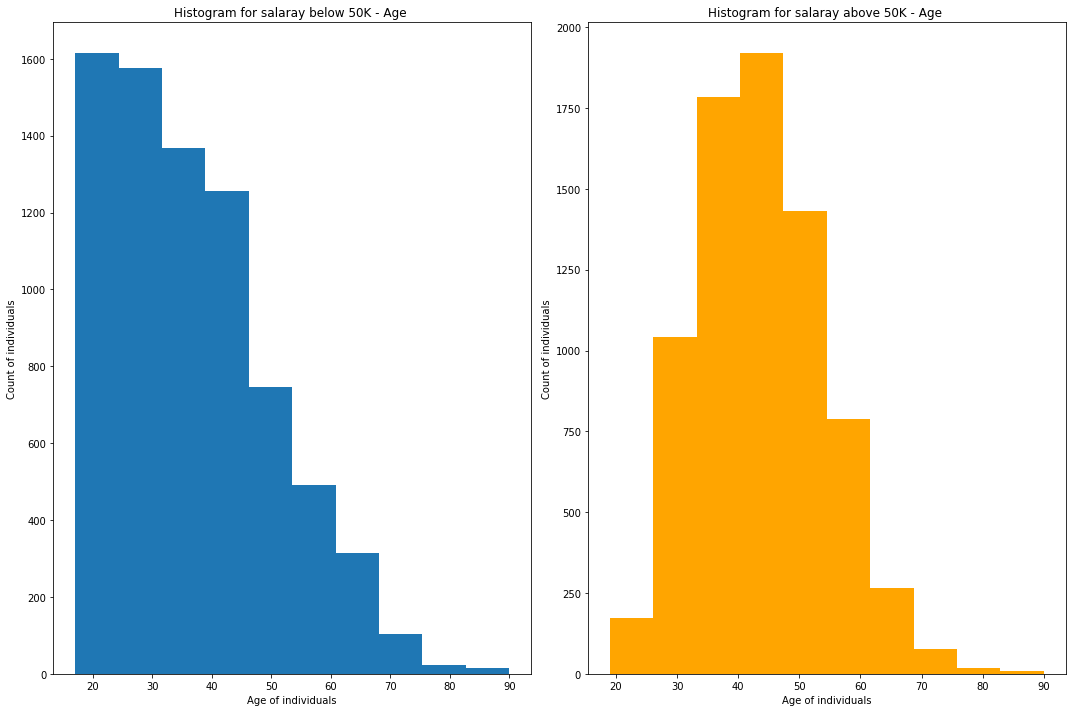

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,10))
axes[0].hist(below_50K_age)
axes[0].set_ylabel("Count of individuals")
axes[0].set_xlabel("Age of individuals")
axes[0].set_title("Histogram for salaray below 50K - Age ")

axes[1].set_ylabel("Count of individuals")
axes[1].set_xlabel("Age of individuals")
axes[1].hist(above_50K_age,color = "orange")
axes[1].set_title("Histogram for salaray above 50K - Age ")

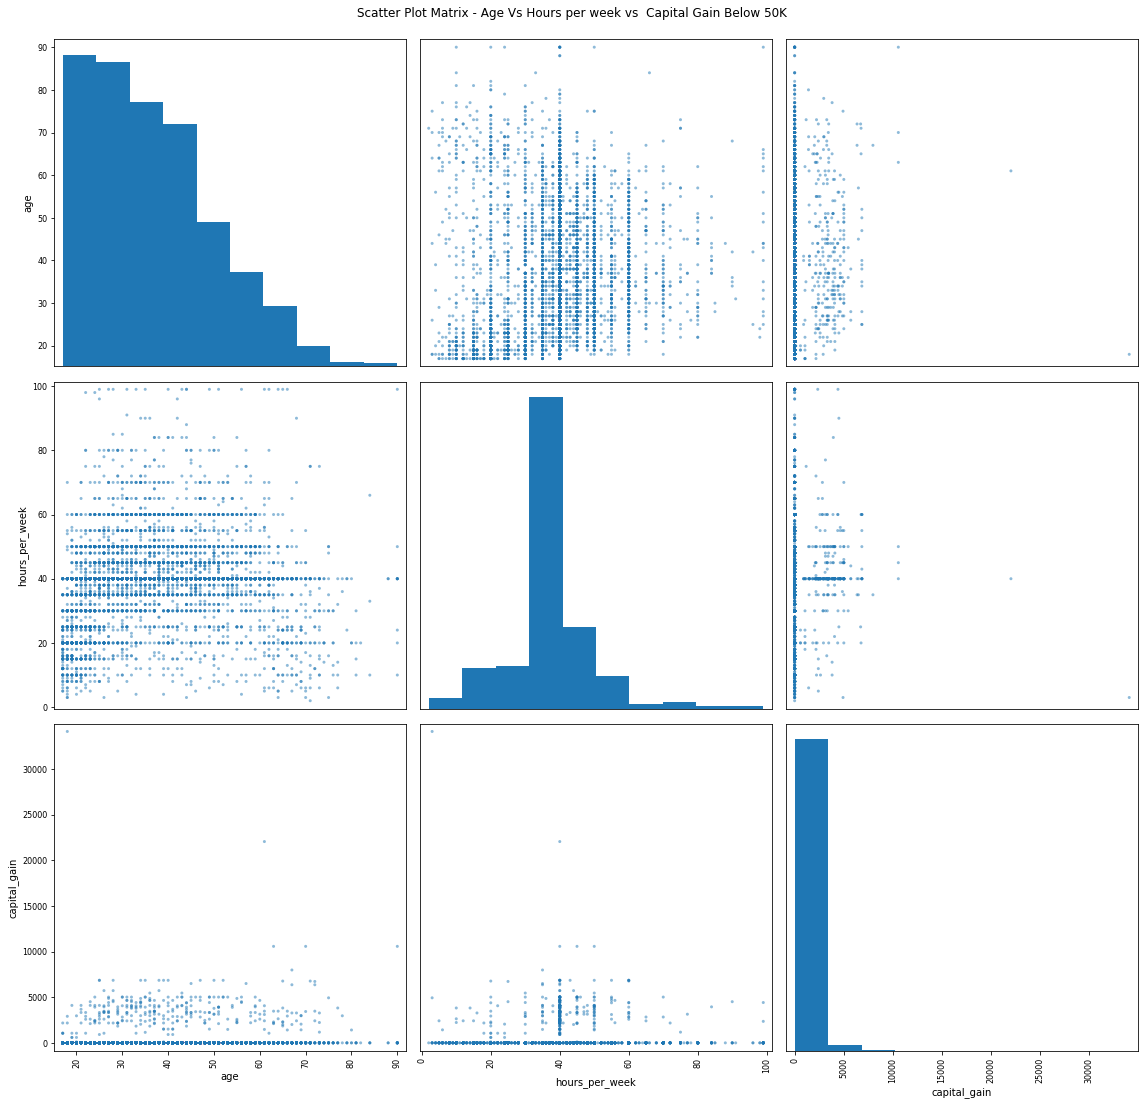

In [ ]:

below_50K_required_columns = below_50K[['age','hours_per_week','capital_gain']]
pd.plotting.scatter_matrix(below_50K_required_columns,figsize=(16,15))
plt.suptitle('Scatter Plot Matrix - Age Vs Hours per week vs  Capital Gain Below 50K',y=1.02)
plt.show()

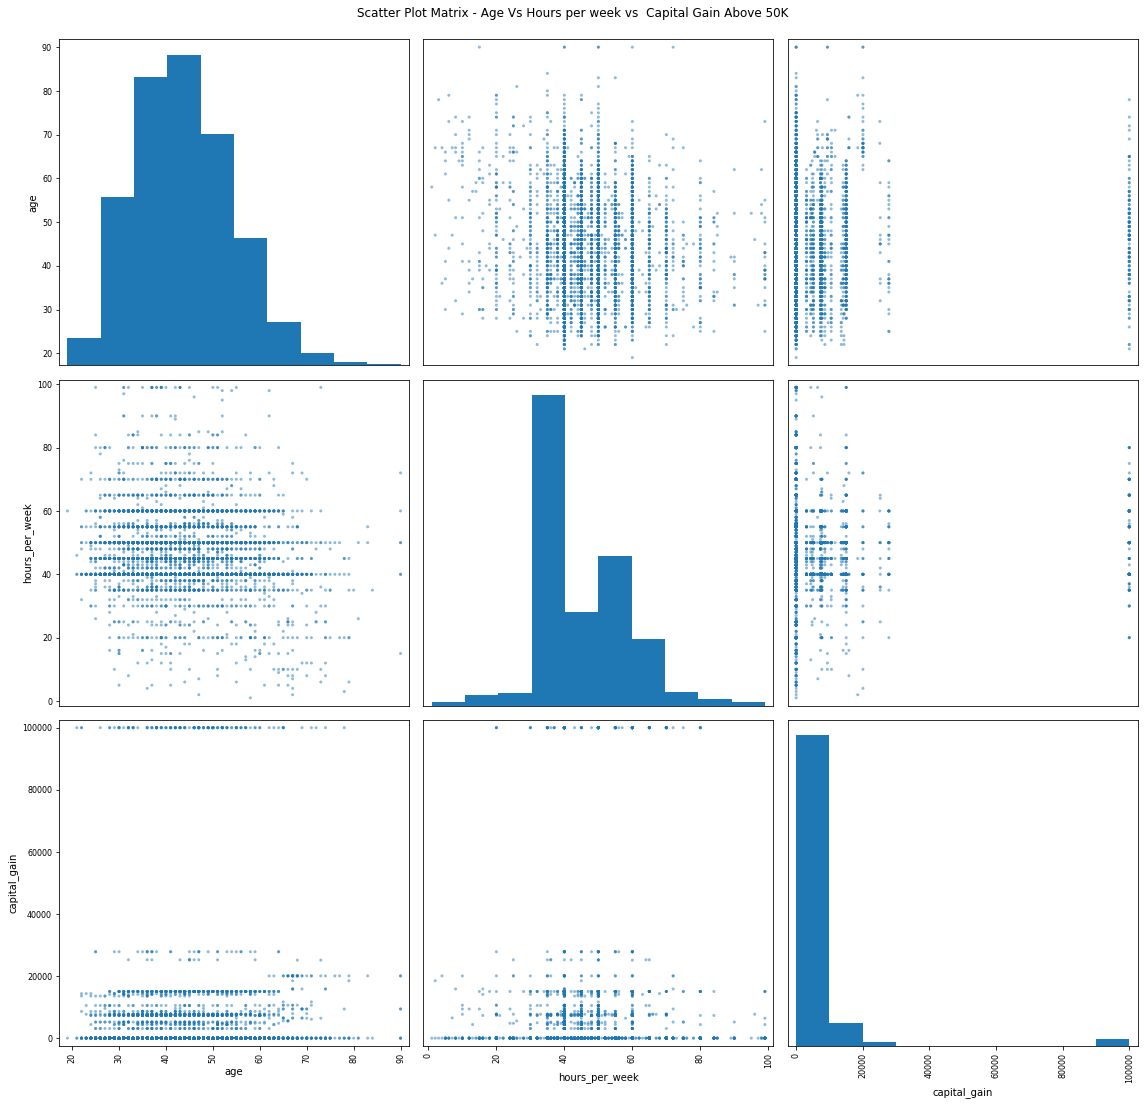

In [ ]:

above_50K_required_columns = above_50K[['age','hours_per_week','capital_gain']]
pd.plotting.scatter_matrix(above_50K_required_columns,figsize=(16,15))
plt.suptitle('Scatter Plot Matrix - Age Vs Hours per week vs  Capital Gain Above 50K',y=1.02)
plt.show()


Text(0, 0.5, 'capital_gain')

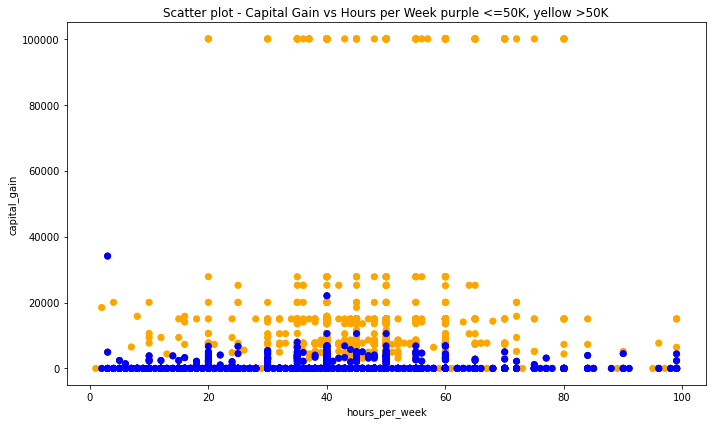

In [ ]:
import matplotlib 
colors = df['class']
x = df['hours_per_week']
y = df['capital_gain']

plt.scatter(x, y, c = colors)
color = ['blue','orange']

plt.scatter(x, y, c = colors,cmap=matplotlib.colors.ListedColormap(color))
plt.title("Scatter plot - Capital Gain vs Hours per Week purple <=50K, yellow >50K")
plt.xlabel('hours_per_week')
plt.ylabel('capital_gain')


Text(0, 0.5, 'capital_gain')

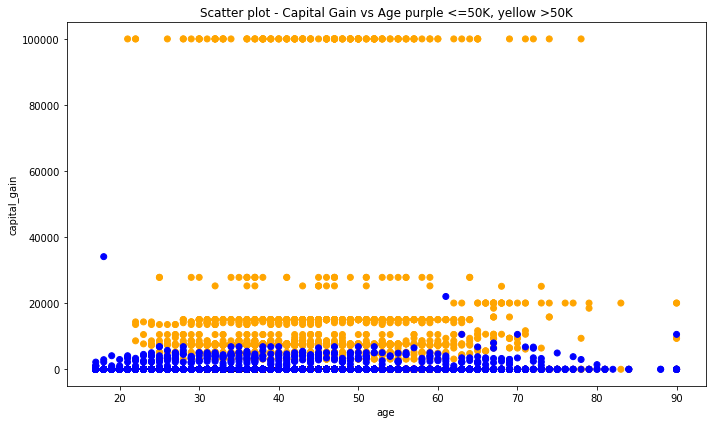

In [ ]:
colors = df['class']
x = df['age']
y = df['capital_gain']
color = ['blue','orange']

plt.scatter(x, y, c = colors,cmap=matplotlib.colors.ListedColormap(color))
plt.title("Scatter plot - Capital Gain vs Age purple <=50K, yellow >50K")
plt.xlabel('age')
plt.ylabel('capital_gain')